In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpig
from keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
import os

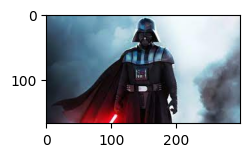

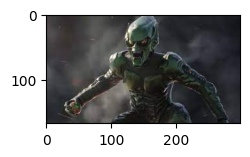

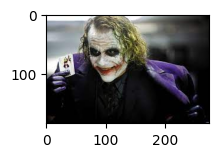

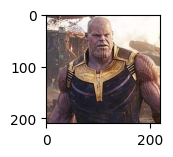

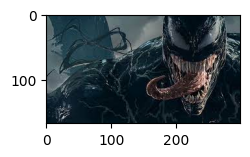

In [4]:
class_names = ['Vader','Green Goblin','Joker','Thanos','Venom']


for i in range(5):
    paths = os.path.join('Villains', class_names[i], class_names[i]+' 1.jpg')
    if class_names[i]=='Vader':
        vader = 'Darth Vader'
        paths = os.path.join('Villains', vader, class_names[i]+' 1.jpg')
    image = plt.imread(paths)
    plt.subplot(3, 1, 1)
    plt.imshow(image)
    plt.show()


## Load Data

In [5]:
IMG_PATH = 'Villains'
img_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=0.45,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        validation_split=0.1,
        fill_mode='nearest'
)

In [6]:
train_generator = img_datagen.flow_from_directory(
        IMG_PATH,
        target_size=(150,150),
        batch_size=32,
        shuffle=True,
        class_mode='categorical',
        subset='training'
)

validation_generator = img_datagen.flow_from_directory(
        IMG_PATH,
        target_size=(150,150),
        batch_size=32,
        shuffle=True,
        class_mode='categorical',
        subset='validation'
)

Found 90 images belonging to 5 classes.
Found 10 images belonging to 5 classes.


In [5]:
img_generator = img_datagen.flow_from_directory(
        IMG_PATH,
        target_size=(150,150),
        batch_size=32,
        shuffle=True,
        class_mode='categorical',
        save_to_dir='augmented',
        save_prefix='aug',
        save_format='jpg'
)

Found 100 images belonging to 5 classes.


In [6]:
file_names= img_generator.filenames
labels= img_generator.labels
label_dict=img_generator.class_indices

In [7]:
label_dict

{'Darth Vader': 0, 'Green Goblin': 1, 'Joker': 2, 'Thanos': 3, 'Venom': 4}

## Preview Data

(32, 150, 150, 3)


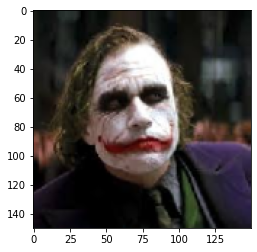

(32, 150, 150, 3)


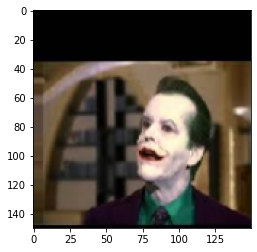

(32, 150, 150, 3)


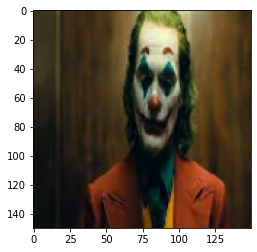

(4, 150, 150, 3)


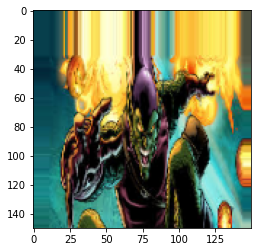

(32, 150, 150, 3)


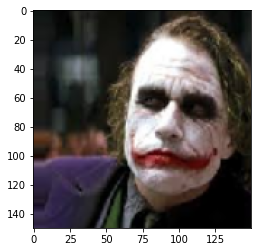

In [8]:
for _ in range(5):
    img, label = img_generator.next()
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

## Modelling

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', input_shape=[150, 150, 3]),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])


In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
hasil = model.fit(train_generator,validation_data=validation_generator, epochs=10)

Epoch 1/10
3/3 [==============================] - 18s 5s/step - loss: 1.7004 - accuracy: 0.1778 - val_loss: 1.6143 - val_accuracy: 0.2000
Epoch 2/10
3/3 [==============================] - 17s 5s/step - loss: 1.6154 - accuracy: 0.1889 - val_loss: 1.6079 - val_accuracy: 0.2000
Epoch 3/10
3/3 [==============================] - 14s 4s/step - loss: 1.5898 - accuracy: 0.2111 - val_loss: 1.5636 - val_accuracy: 0.4000
Epoch 4/10
3/3 [==============================] - 12s 4s/step - loss: 1.5530 - accuracy: 0.3111 - val_loss: 1.5115 - val_accuracy: 0.4000
Epoch 5/10
3/3 [==============================] - 12s 4s/step - loss: 1.4735 - accuracy: 0.4000 - val_loss: 1.5701 - val_accuracy: 0.0000e+00
Epoch 6/10
3/3 [==============================] - 12s 4s/step - loss: 1.6025 - accuracy: 0.3111 - val_loss: 1.5013 - val_accuracy: 0.4000
Epoch 7/10
3/3 [==============================] - 11s 4s/step - loss: 1.4243 - accuracy: 0.2889 - val_loss: 1.4962 - val_accuracy: 0.1000
Epoch 8/10
3/3 [==============

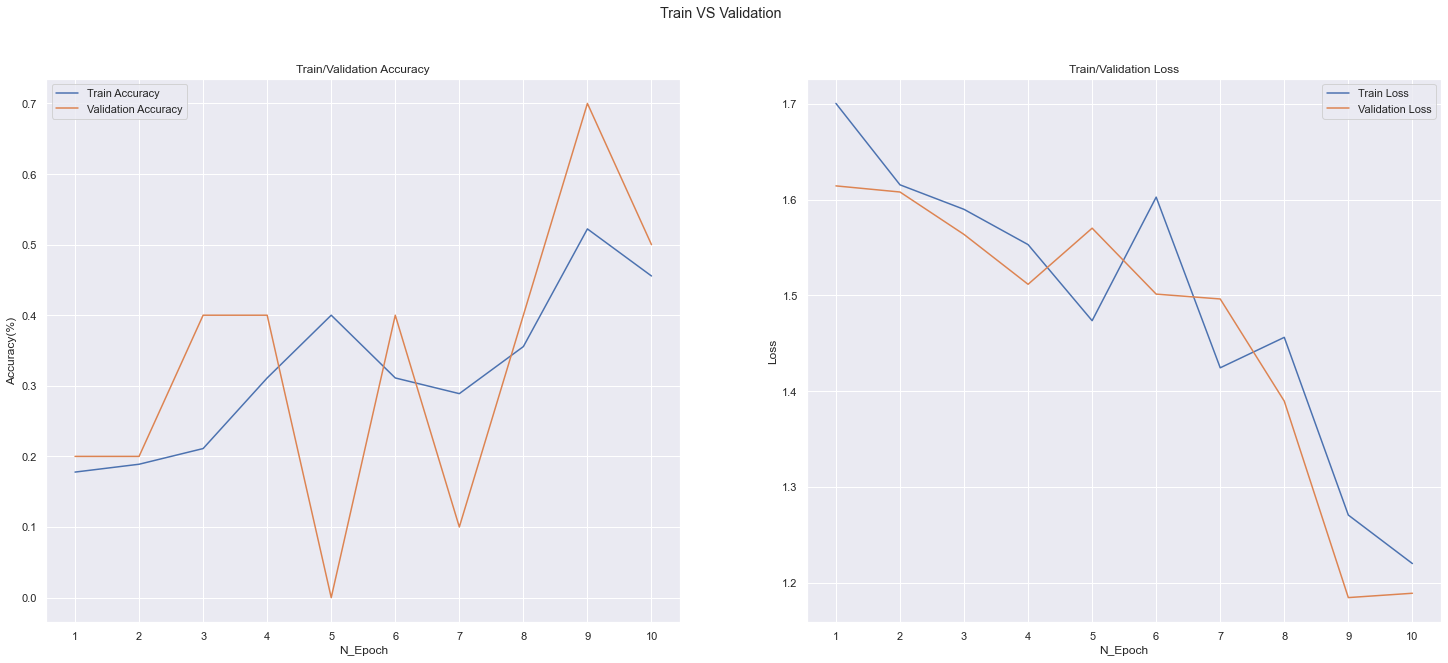

In [12]:
epoch = [i+1 for i in range(10)]

sns.set_theme()

plt.figure(figsize=(25, 10))
plt.suptitle('Train VS Validation')

#Subplot Akurasi
plt.subplot(1,2,1)
sns.lineplot(x=epoch,y = hasil.history['accuracy'],label ='Train Accuracy')
sns.lineplot(x=epoch,y = hasil.history['val_accuracy'],label ='Validation Accuracy')

plt.xticks(epoch)
plt.ylabel('Accuracy(%)')
plt.xlabel('N_Epoch')
plt.title("Train/Validation Accuracy")

#Subplot Loss
plt.subplot(1,2,2)
sns.lineplot(x=epoch,y = hasil.history['loss'],label ='Train Loss')
sns.lineplot(x=epoch,y = hasil.history['val_loss'],label ='Validation Loss')

plt.xticks(epoch)
plt.title("Train/Validation Loss")
plt.xlabel('N_Epoch')
plt.ylabel('Loss')
plt.show()
